In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18,10]
plt.style.use('ggplot')

In [2]:
train=pd.read_csv('train.csv',index_col='row_id')
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,NaN
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [3]:
train.shape

(101230332, 9)

In [5]:
#train=train.set_index('row_id')

In [6]:
train.sample(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
85506119,10903853492,1820822921,433,0,798,3,1,14000.0,True
44821815,53841482579,948893441,3604,0,6516,2,1,35000.0,True
88793389,365924,1887891517,3748,0,13,0,1,12000.0,False
25013998,2085895337,534814622,8121,0,2167,0,1,36000.0,True
44678493,2905117679,946169883,4492,0,74,1,0,28000.0,False
52487490,3817994357,1112442103,359,0,587,3,1,17000.0,True
19035569,13733909773,408955659,4025,0,22,0,0,20000.0,True
28582782,10006141486,610650344,8488,0,1700,1,0,13000.0,True
2344246,3880159695,50369205,1369,0,431,1,1,16000.0,True


In [7]:
train.content_type_id.value_counts()

0    99271300
1     1959032
Name: content_type_id, dtype: int64

In [8]:
train=train.sample(1000000)

In [9]:
train.user_answer.value_counts()

 0    277868
 1    267730
 3    257421
 2    177683
-1     19298
Name: user_answer, dtype: int64

In [10]:
train.answered_correctly.value_counts()

 1    644981
 0    335721
-1     19298
Name: answered_correctly, dtype: int64

In [11]:
lectures=pd.read_csv('lectures.csv')
lectures.sample(15)

,lecture_id,tag,part,type_of
138,12007,177,5,concept
379,30207,43,5,concept
213,17519,97,7,concept
30,2476,173,5,solving question
238,19224,128,6,concept
41,3668,64,5,solving question
394,31108,115,6,concept
221,18239,31,5,concept
95,8320,166,6,concept
241,19744,141,2,concept


In [12]:
questions=pd.read_csv('questions.csv')
questions.sample(15)

,question_id,bundle_id,correct_answer,part,tags
11764,11764,11764,3,2,2 107 38 92
5347,5347,5347,2,5,166
11909,11909,11909,0,2,143 20 81 92
9852,9852,9852,0,5,53
9224,9224,9224,2,5,134
11462,11462,11462,1,5,8
7405,7405,7401,2,7,97 0 146 11 122
2160,2160,2159,2,3,74 81 92
8970,8970,8970,1,5,73
1047,1047,1047,0,2,148 32 38 102


In [13]:
train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
60106804,27306163097,1275960086,4979,0,145,0,0,37000.0,True
67906754,257759,1444080287,2946,0,6,2,0,22333.0,False
23854783,17969190599,510042382,13,0,23,1,1,22000.0,True
3663158,531687704,78925649,10274,0,194,3,1,31500.0,True
88070635,25369522912,1873883070,4851,0,1110,0,0,8000.0,True
...,...,...,...,...,...,...,...,...,...
83275149,4273596289,1774694798,254,0,2290,1,0,16000.0,True
43458917,3078671978,920467558,4212,0,256,3,1,68000.0,True
93419046,94473134,1982421538,10518,0,47,2,1,25333.0,True


In [14]:
train.user_id.nunique()

190191

C:\Users\rammstein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rammstein\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


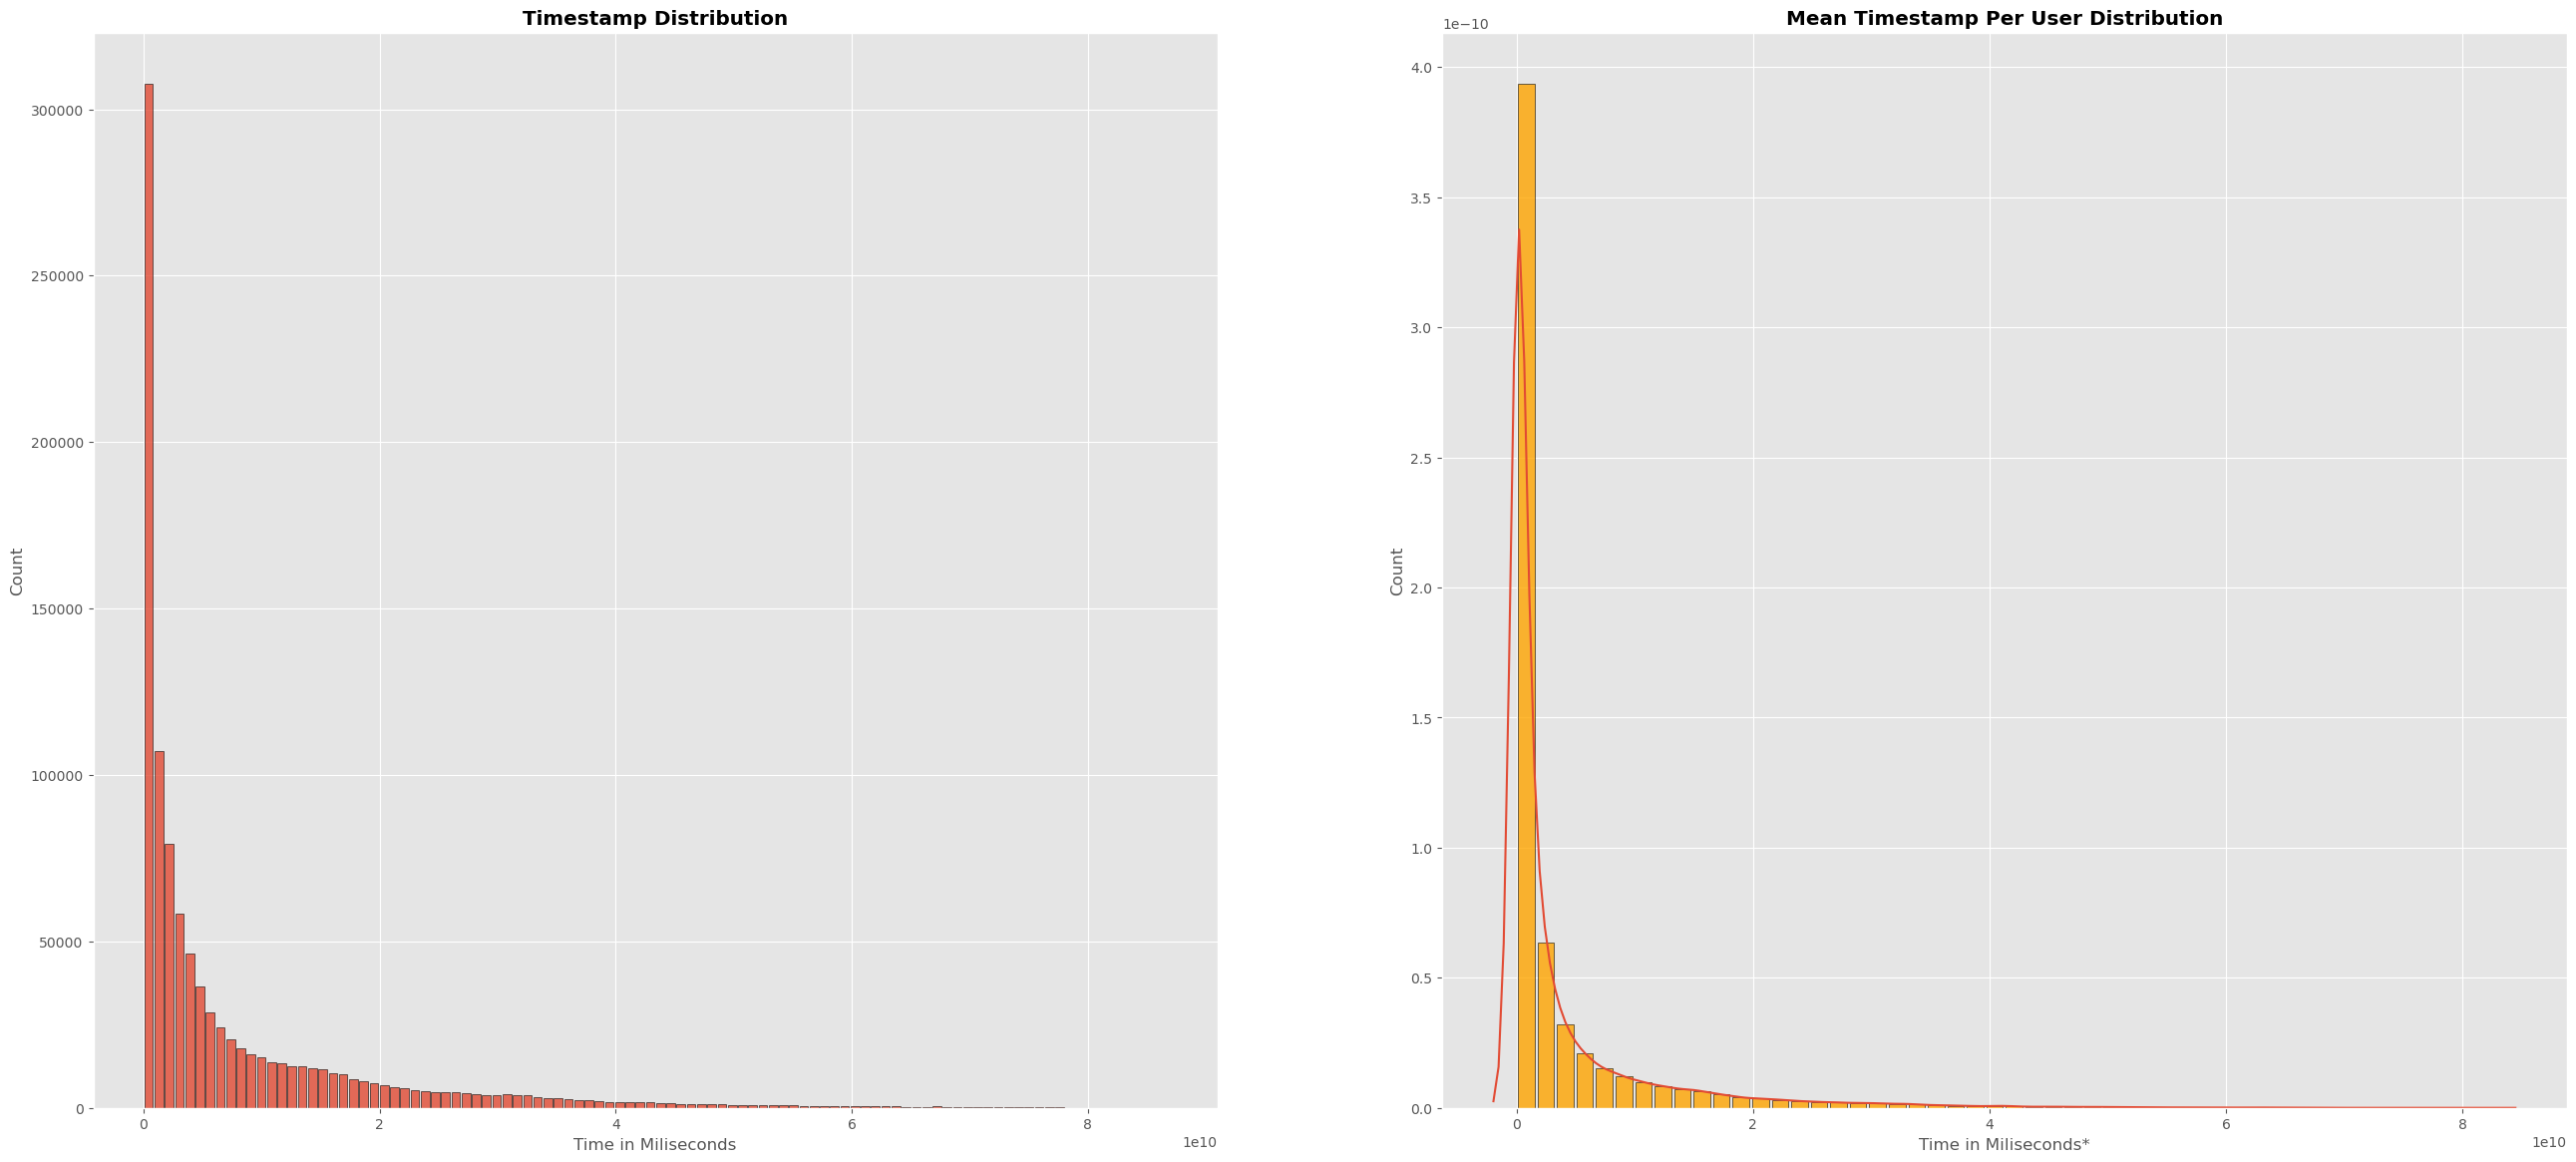

In [15]:
# из графика №1 видно, что меньшее количество времени на ответ требуется большему количеству людей
# из графика №2 распределение среднего времени на ответы для пользователей 

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(32,14))

sns.distplot(train.timestamp, kde=False,hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8}, bins=100, ax=ax[0])

ax[0].set_xlabel('Time in Miliseconds')
ax[0].set_ylabel('Count')
ax[0].set_title('Timestamp Distribution', weight='bold')


sns.distplot(train.groupby('user_id').agg({'timestamp': 'mean'}), hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                  'color':'orange',
                 'alpha': 0.8}, bins=50,ax=ax[1])

ax[1].set_xlabel('Time in Miliseconds*')
ax[1].set_ylabel('Count')
ax[1].set_title('Mean Timestamp Per User Distribution', weight='bold')

plt.show()

In [16]:
train[train.user_id==276328221]

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
12756350,3160226767,276328221,917,0,398,3,1,14000.0,True
12757198,26511209024,276328221,1321,0,1246,0,0,21000.0,True
12756754,6045316795,276328221,9979,0,804,0,1,8000.0,True
12756444,3708968415,276328221,5905,0,493,0,1,22000.0,True
12756020,1873554810,276328221,4498,0,68,2,1,22000.0,True
12756640,4921636058,276328221,5865,0,689,0,1,31000.0,True
12756919,11909214401,276328221,3975,0,967,1,1,15000.0,True
12757086,25819436018,276328221,746,0,1134,0,0,33000.0,True
12756388,3323038564,276328221,703,0,436,0,1,16000.0,True


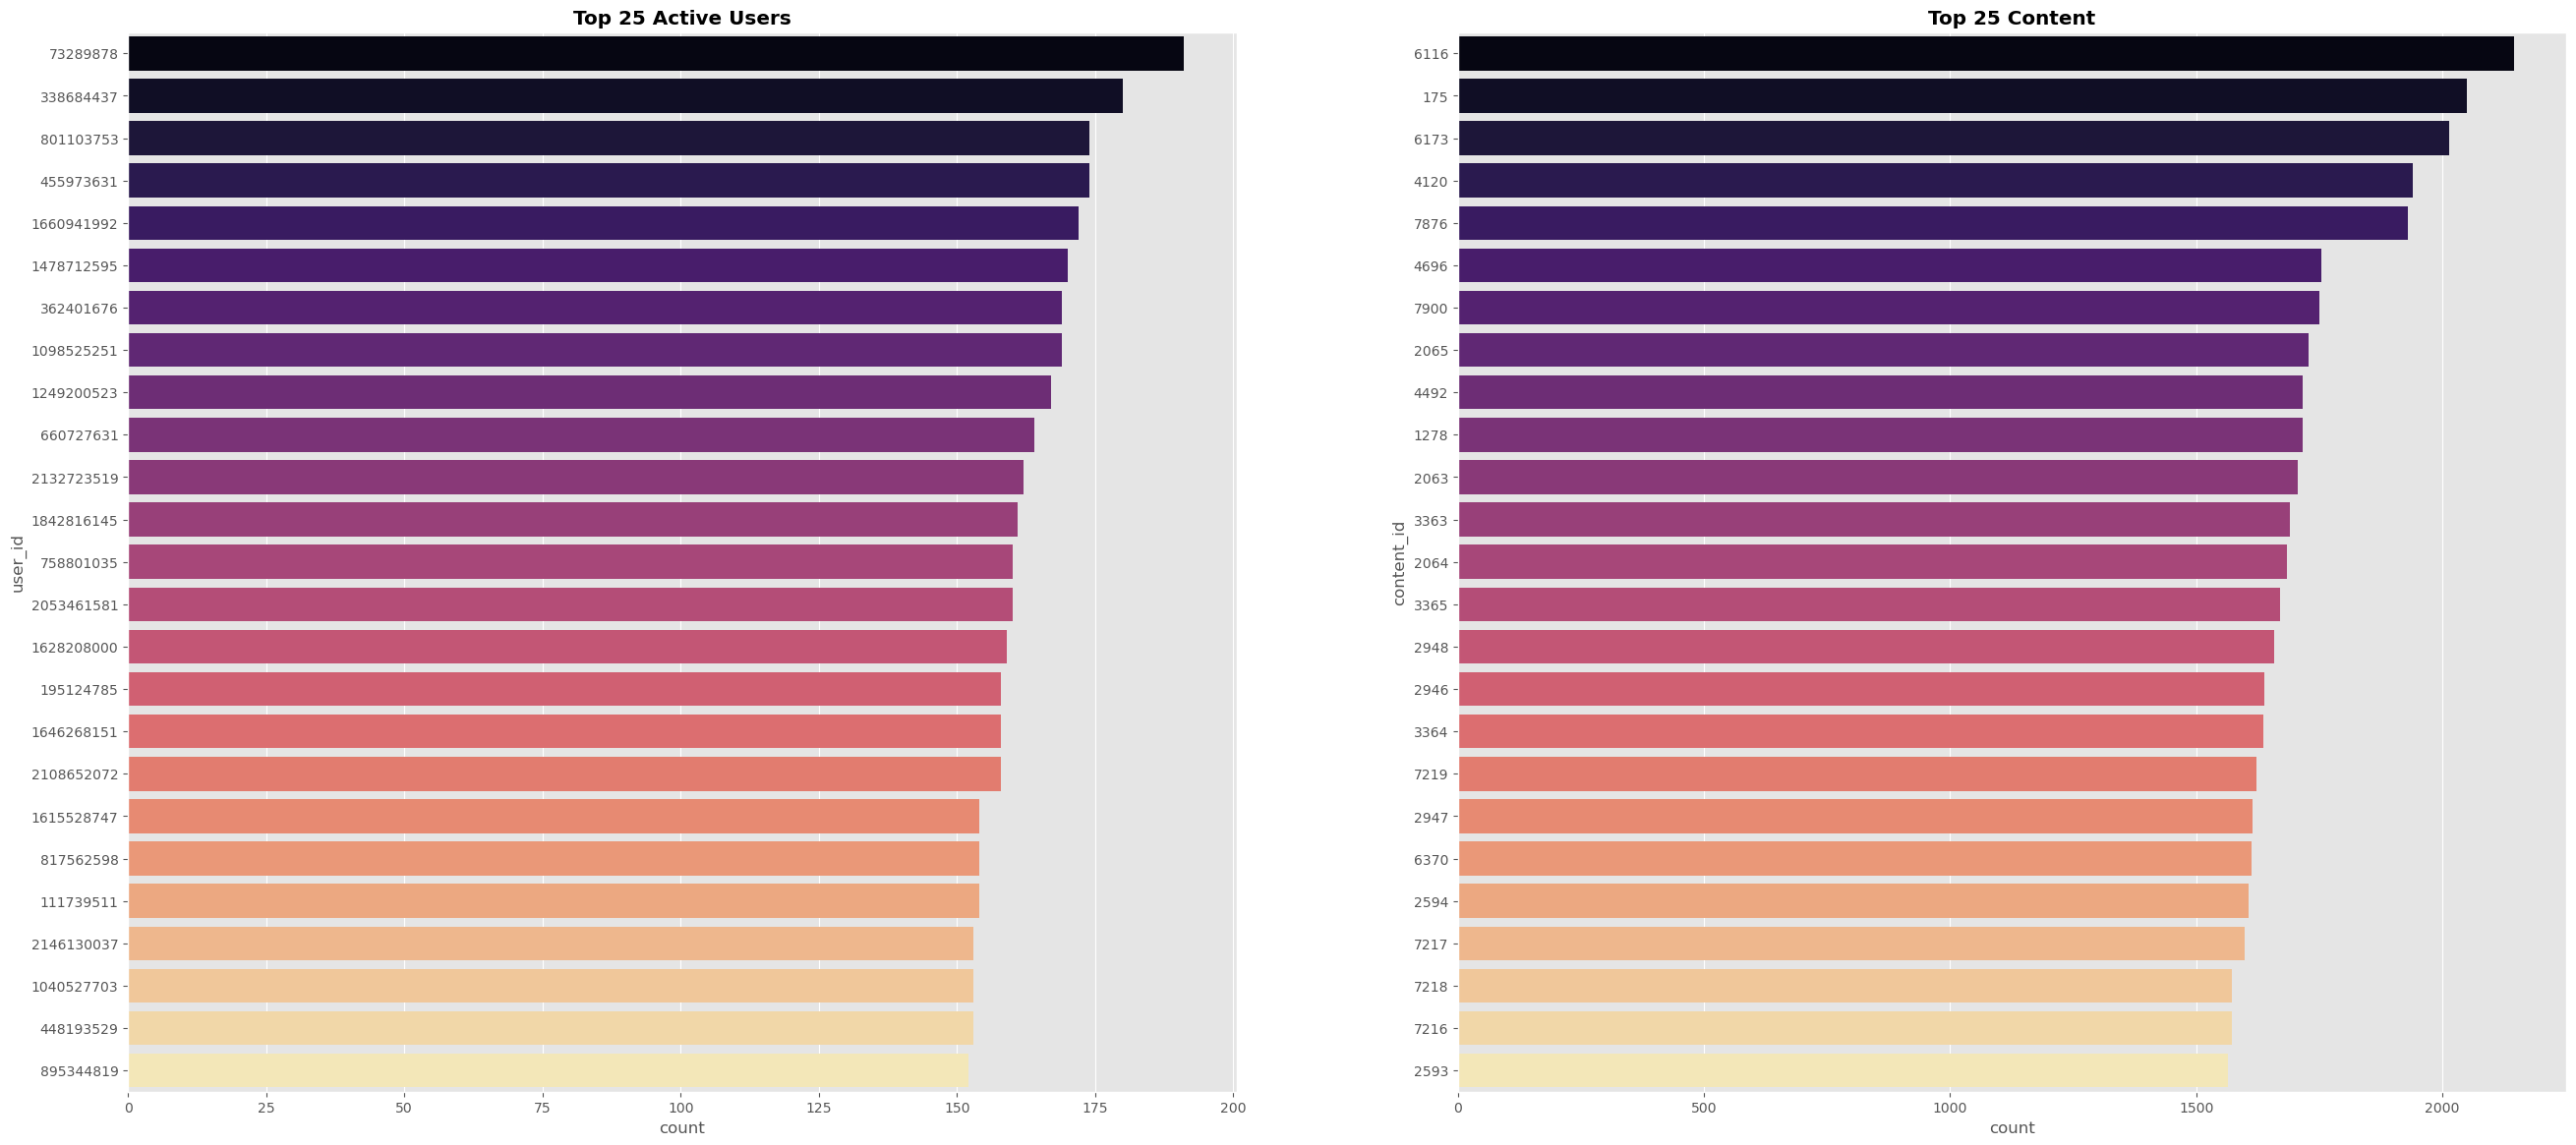

In [17]:
#  График 1 отображает самых активных пользователей
# График 2 отображает самый популярный контент

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(32,14))

# Distplot:

sns.countplot(y='user_id', data=train, order=train.user_id.value_counts().index[:25], palette='magma',ax = ax[0])
ax[0].set_title('Top 25 Active Users', weight='bold')

# Countplot:

sns.countplot(y='content_id', data=train, order=train.content_id.value_counts().index[:25], palette='magma',ax = ax[1])
ax[1].set_title('Top 25 Content', weight='bold')


plt.show()

In [19]:
train.user_id.value_counts().index[:25]

Int64Index([  73289878,  338684437,  801103753,  455973631, 1660941992,
            1478712595,  362401676, 1098525251, 1249200523,  660727631,
            2132723519, 1842816145,  758801035, 2053461581, 1628208000,
             195124785, 1646268151, 2108652072, 1615528747,  817562598,
             111739511, 2146130037, 1040527703,  448193529,  895344819],
           dtype='int64')

In [20]:
usr_ans = train.groupby('user_id').agg({ 'answered_correctly': ['mean','sum', 'count']})
usr_ans.columns = ['avg_correct_answer','num_of_correct', 'total_answers']

usr_ans['num_of_correct'] = usr_ans['num_of_correct'].astype('int16')
usr_ans['total_answers'] = usr_ans['total_answers'].astype('int16')


train = pd.merge(train, usr_ans, how='left', on = 'user_id')

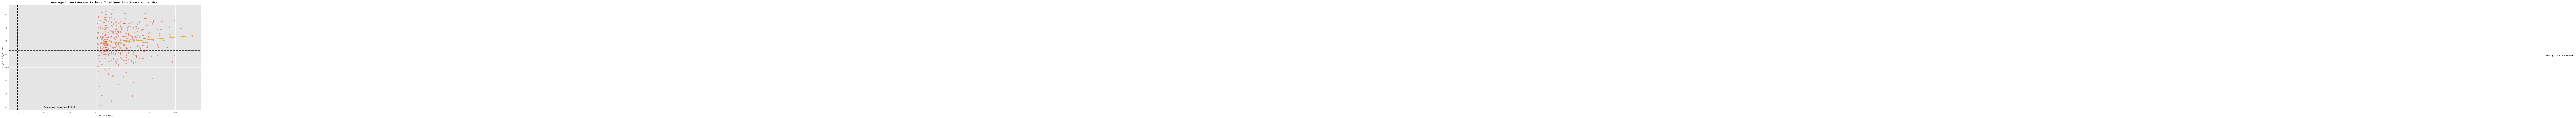

In [21]:
# Зависимость доли успешных решений от количества этиих решений. Эффективность растет.

sns.regplot(data=usr_ans[usr_ans['total_answers']> 100], y='avg_correct_answer', x='total_answers', ci=False, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
plt.axhline(train.avg_correct_answer.mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(train.total_answers.mean(), color='k', linestyle='dashed', linewidth=3)

min_ylim, max_ylim = plt.ylim()
plt.text(train.total_answers.mean()+25, max_ylim*0.20, 'Average Questions Solved {:.2f}'.format(train.total_answers.mean()))
plt.text(train.total_answers.mean()+2400, max_ylim*0.6, 'Average Correct Answer: {:.2f}'.format(train.avg_correct_answer.mean()))

plt.title('Average Correct Answer Ratio vs. Total Questions Answered per User', weight='bold')
plt.show()

In [22]:
train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,avg_correct_answer,num_of_correct,total_answers
0,27306163097,1275960086,4979,0,145,0,0,37000.0,True,0.200000,1,5
1,257759,1444080287,2946,0,6,2,0,22333.0,False,0.000000,0,1
2,17969190599,510042382,13,0,23,1,1,22000.0,True,0.333333,4,12
3,531687704,78925649,10274,0,194,3,1,31500.0,True,0.666667,10,15
4,25369522912,1873883070,4851,0,1110,0,0,8000.0,True,0.764706,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4273596289,1774694798,254,0,2290,1,0,16000.0,True,0.769231,30,39
999996,3078671978,920467558,4212,0,256,3,1,68000.0,True,0.617021,29,47
999997,94473134,1982421538,10518,0,47,2,1,25333.0,True,0.600000,3,5
999998,1071795,580118161,5594,0,14,3,1,19000.0,True,1.000000,1,1


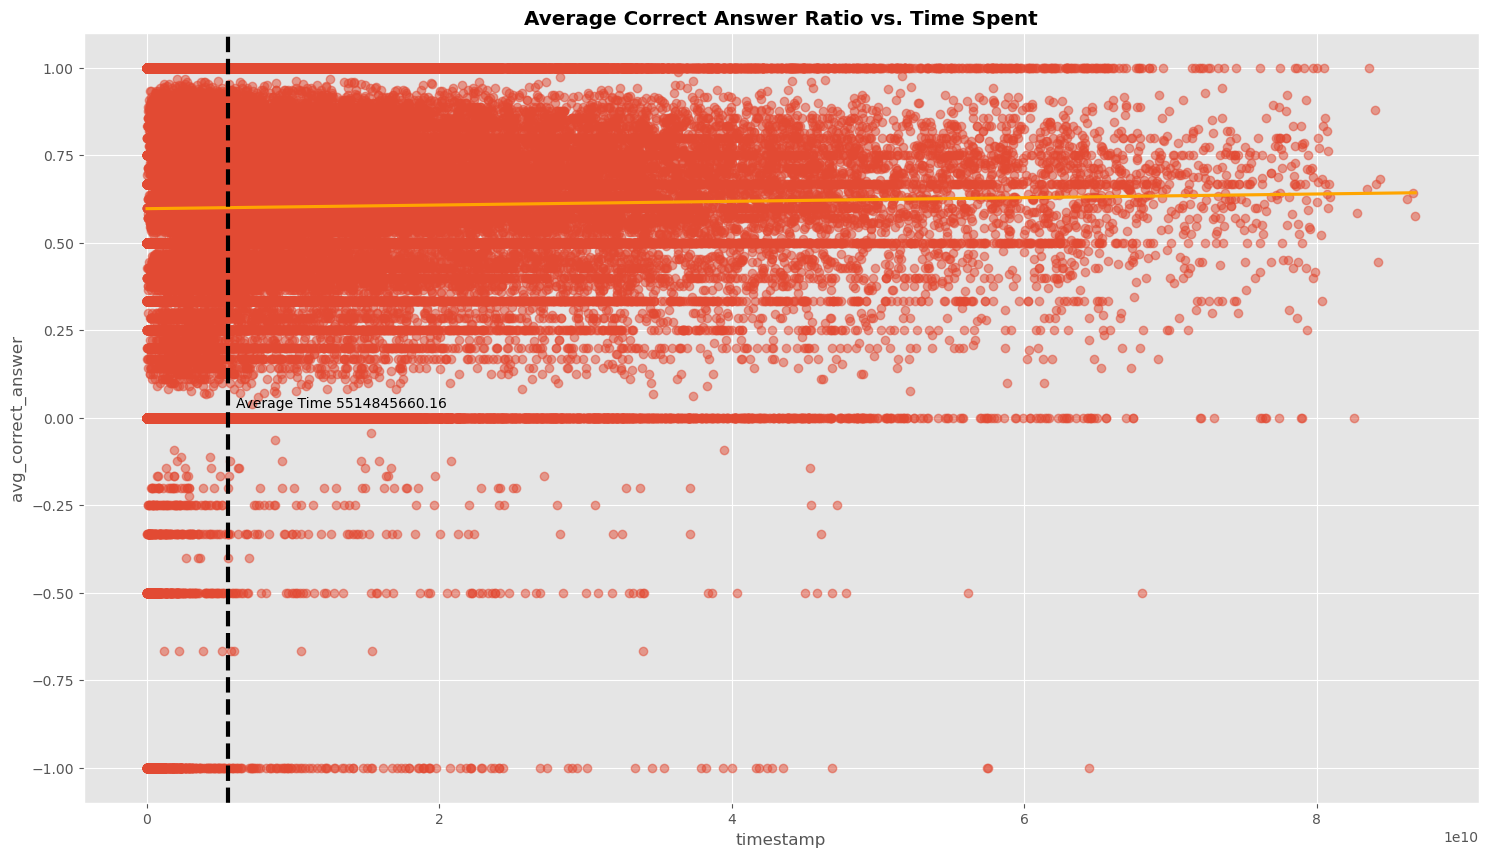

In [23]:
#зависимость доли успешных ответов от среднего времени проведенного за заданиями. Склонность больше думать над заданием приводила к лучшим результатам


total_time = train.groupby('user_id')["timestamp"].max()
total_time = pd.merge(total_time.reset_index(), usr_ans.reset_index(), how='left', on = 'user_id')

sns.regplot(data=total_time[total_time['timestamp']> 3.6e+6], y='avg_correct_answer', x='timestamp', ci=False, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})

plt.axvline(total_time.timestamp.mean(), color='k', linestyle='dashed', linewidth=3)
plt.text(total_time.timestamp.mean()+total_time.timestamp.mean()*0.1, max_ylim*0.03, 'Average Time {:.2f}'.format(total_time.timestamp.mean()))

plt.title('Average Correct Answer Ratio vs. Time Spent', weight='bold')
plt.show()



In [26]:
inc=train.corr()
inc

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,avg_correct_answer,num_of_correct,total_answers
timestamp,1.000000,0.000567,0.052982,0.000471,0.432053,-0.000719,0.023884,0.013967,0.043008,0.279221,0.291956
user_id,0.000567,1.000000,0.002097,0.001097,0.002717,-0.000350,-0.001241,-0.000520,-0.002610,0.004517,0.005501
content_id,0.052982,0.002097,1.000000,0.411702,0.045170,-0.105521,-0.195983,0.151110,-0.063483,0.021101,0.028974
content_type_id,0.000471,0.001097,0.411702,1.000000,-0.021219,-0.279607,-0.436618,NaN,-0.145035,-0.027834,-0.013212
task_container_id,0.432053,0.002717,0.045170,-0.021219,1.000000,0.007375,0.060644,-0.013539,0.099771,0.754913,0.777836
user_answer,-0.000719,-0.000350,-0.105521,-0.279607,0.007375,1.000000,0.125252,0.013677,0.045651,0.010291,0.005730
answered_correctly,0.023884,-0.001241,-0.195983,-0.436618,0.060644,0.125252,1.000000,-0.005691,0.475632,0.104398,0.061724
prior_question_elapsed_time,0.013967,-0.000520,0.151110,NaN,-0.013539,0.013677,-0.005691,1.000000,-0.003507,0.008252,0.007553
avg_correct_answer,0.043008,-0.002610,-0.063483,-0.145035,0.099771,0.045651,0.475632,-0.003507,1.000000,0.219494,0.129772
num_of_correct,0.279221,0.004517,0.021101,-0.027834,0.754913,0.010291,0.104398,0.008252,0.219494,1.000000,0.976105


<AxesSubplot:>

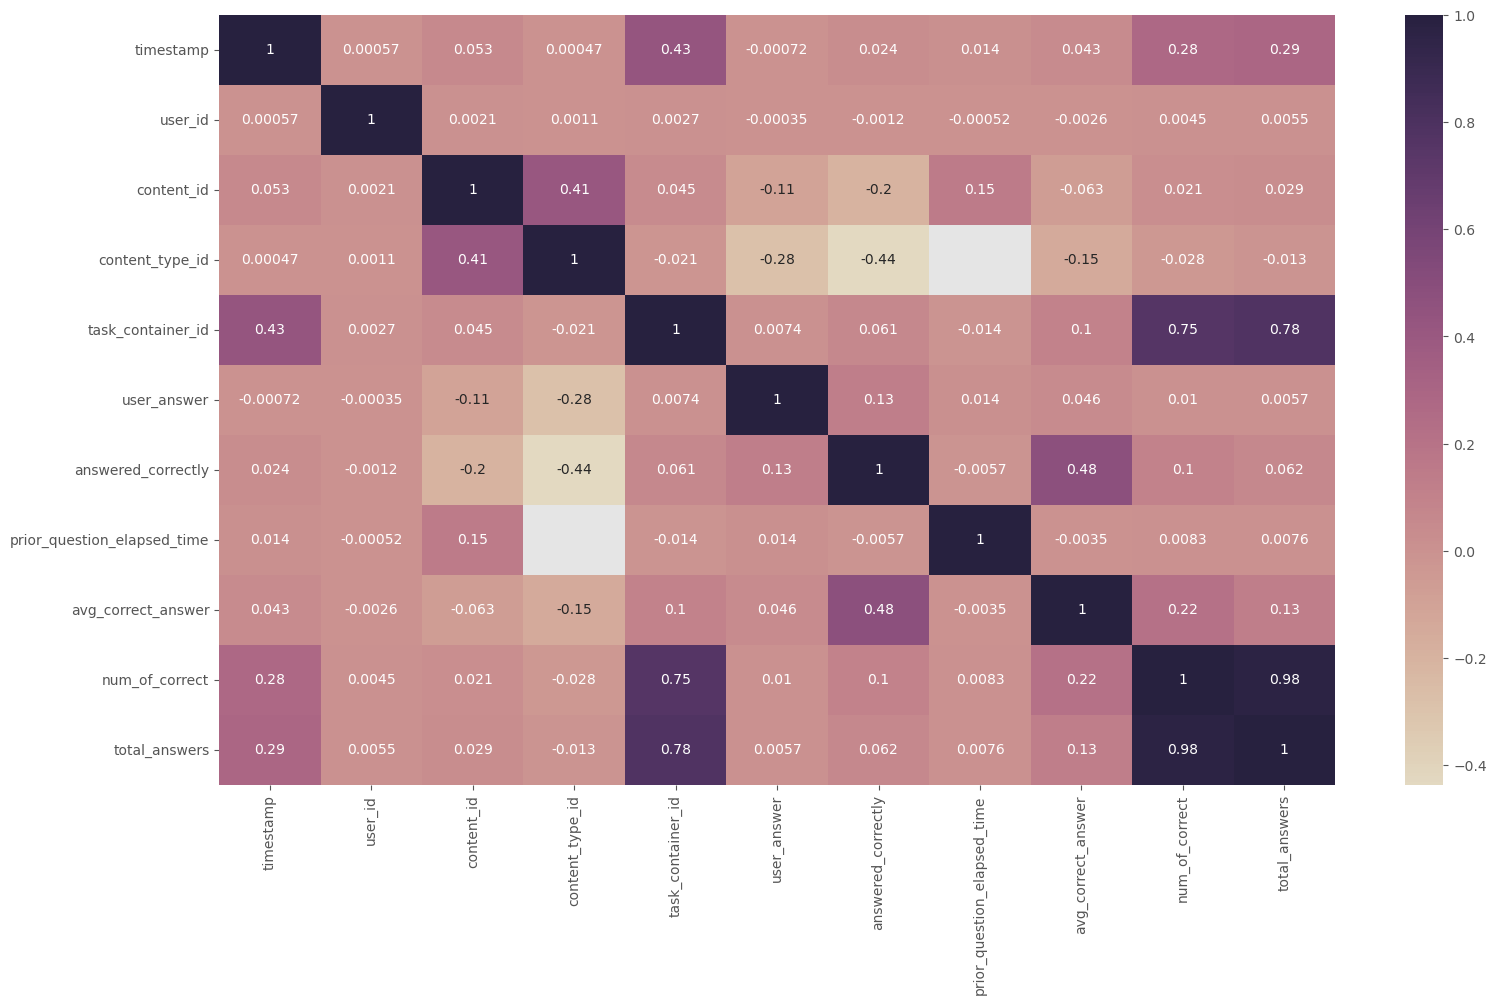

In [27]:
sns.heatmap(inc, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
)

In [28]:
train

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,avg_correct_answer,num_of_correct,total_answers
0,27306163097,1275960086,4979,0,145,0,0,37000.0,True,0.200000,1,5
1,257759,1444080287,2946,0,6,2,0,22333.0,False,0.000000,0,1
2,17969190599,510042382,13,0,23,1,1,22000.0,True,0.333333,4,12
3,531687704,78925649,10274,0,194,3,1,31500.0,True,0.666667,10,15
4,25369522912,1873883070,4851,0,1110,0,0,8000.0,True,0.764706,13,17
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,4273596289,1774694798,254,0,2290,1,0,16000.0,True,0.769231,30,39
999996,3078671978,920467558,4212,0,256,3,1,68000.0,True,0.617021,29,47
999997,94473134,1982421538,10518,0,47,2,1,25333.0,True,0.600000,3,5
999998,1071795,580118161,5594,0,14,3,1,19000.0,True,1.000000,1,1


In [ ]:
# 1.Из матрицы корреляции, предполагалось что будет весомой зависимость времени потраченного на выполениние первого задания, 
    но оказалось что нет, и эта зависимость равна "prior_qustion_elapsed_time = 0,00095"
# 2. Прослеживается зависимость между типом контента (учебного материала) и количеством правильных ответов на него, о чем нам говорит
    зависимость между "answered_correctly" и "contennt_type_id", равная -0,44